In [1]:
# Newton's Polynomial Interpolation

    : f (x) = a0 + a1 (x − x0 ) + a2 (x − x0 )(x − x1 ) + · · · + an (x − x0 )(x − x1 ) · · · (x − xn ),
    : f (x0 ) = a0 = y0
    : a1 = (y1 − y0) /(x1 − x0)
    : a1 = f [x1 , x0 ] =y1 − y0/x1 − x0
    : a2 = f [x2 , x1 ] − f [x1 , x0 ]/x2 - x0
    
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt

u = [-5, -1, 0, 2]
v = [-2, 6, 1, 3]

In [61]:
def ForwDiff(x, y):
    dd_1 = []
    dd_2 = []
    dd_3 = []
    for i in range(len(x)):
        if i != 0:
            dd_1.append(y[i] - y[i-1])
            
    for i in range(len(dd_1)):
        if i != 0:
            dd_2.append(dd_1[i] - dd_1[i-1])
            
    for i in range(len(dd_2)):
        if i != 0:
            dd_3.append(dd_2[i] - dd_2[i-1])
    
    return dd_1, dd_2, dd_3
                    

In [62]:
dd_1, dd_2, dd_3 = ForwDiff(u, v)

In [63]:
print(f"The divided difference column 1: {dd_1}")
print(f"The divided difference column 2: {dd_2}")
print(f"The divided difference column 3: {dd_3}")

The divided difference column 1: [8, -5, 2]
The divided difference column 2: [-13, 7]
The divided difference column 3: [20]


In [64]:
# Now storing possible Coefficients in a list
#If the original grid contains n points, then we will have n+1 coeff

a_0 = v[0]
a_1 = dd_1[0]
a_2 = dd_2[0]
a_3 = dd_3[0]

In [65]:
f_x = []
x_grid = np.arange(-10,10,0.1)

for i in range(len(x_grid)):
    f_x.append(a_0 + a_1*(x_grid[i] - u[0]) + a_2*(x_grid[i] - u[0])*(x_grid[i] - u[1]) + a_3*(x_grid[i] - u[0])*(x_grid[i] - u[1])*(x_grid[i] - u[2]))   
    

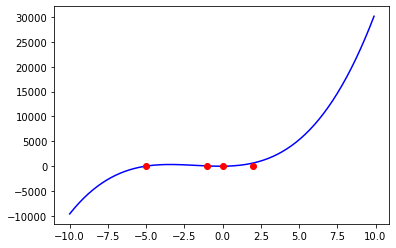

In [66]:
plt.plot(x_grid, f_x,"b", u, v, "ro")

In [9]:
# The program given in the book

In [33]:
# planning the matrix, that will contain the required coefficients

def divided_diff(x,y):
    n = len(y)
    coef_mat = np.zeros((n,n))
    # 1st column contains the elements of y
    coef_mat[:,0] = y
    
    for j in range(1,n):  # Starting with the column index loop
        # since, first column is already fixed, therefore altering the elements from 2nd column
        for i in range(n-j): # Last row is going to be zero, so not changing anything there
            coef_mat[i][j] = (coef_mat[i+1][j-1] - coef_mat[i][j-1])/(x[i+j] - x[i])
            
    return coef_mat            

In [35]:
# Determining the newton polynomial
# Did not understand the functioning of this function
def newton_poly(coef_row, x_input, x_grid):
   
    n = len(x_input) -1  

    p = coef_row[n]    # Storing the last element of the dd row in p 
    for k in range(1, n +1):
        # the scalar operation on a list, acts on all the elements
        p = coef_row[n - k] + (x_grid - x_input[n -k])*p     
        
    return p

In [47]:
u = np.array([-5, -1, 0, 2])
v = np.array([-2, 6, 1, 3])

In [48]:
# The forward difference coefficient is confined to the first row of the matrix
# therefore we call back and store the fist row of matrix into dd 

dd = divided_diff(u, v)[0, :]

In [49]:
# setting up new x grid and evaluating the polynomial on that

x_grid = np.arange(-5, 2.1, 0.1)
y_new = newton_poly(dd, u, x_grid)

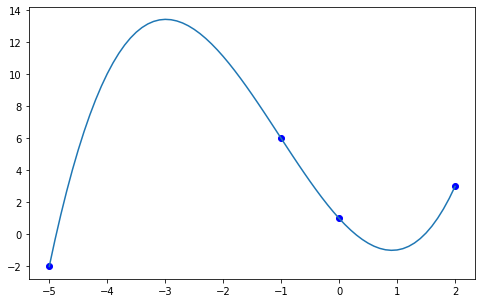

In [51]:
plt.figure(figsize = (8,5))
plt.plot(u, v, "bo")
plt.plot(x_grid, y_new)